In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import datetime

#Current date/time
datetime = datetime.datetime.now()

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [75]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

## Perform API Calls

In [76]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

weather = []

city_number = 1

for city in cities:
    target_url = url + "&q=" + city
    response = requests.get(target_url).json()
    
    if response != {'cod': '404', 'message': 'city not found'}:
        weather.append(response)
        print(f'Retrieving weather data for city number {city_number}: {city}') 
        city_number = city_number + 1
    else:
        print(f'City not found, removing city from list:{city}')
        cities.remove(city)
    

Retrieving weather data for city number 1: ous
Retrieving weather data for city number 2: provideniya
Retrieving weather data for city number 3: gazojak
Retrieving weather data for city number 4: pisco
Retrieving weather data for city number 5: mataura
Retrieving weather data for city number 6: bima
Retrieving weather data for city number 7: busselton
Retrieving weather data for city number 8: bluff
Retrieving weather data for city number 9: rikitea
Retrieving weather data for city number 10: lata
Retrieving weather data for city number 11: norman wells
Retrieving weather data for city number 12: yellowknife
Retrieving weather data for city number 13: punta arenas
Retrieving weather data for city number 14: le mars
Retrieving weather data for city number 15: alamosa
Retrieving weather data for city number 16: hermanus
Retrieving weather data for city number 17: central point
Retrieving weather data for city number 18: dikson
Retrieving weather data for city number 19: presidente olegar

Retrieving weather data for city number 145: vao
Retrieving weather data for city number 146: vardo
Retrieving weather data for city number 147: mayo
Retrieving weather data for city number 148: cap-aux-meules
Retrieving weather data for city number 149: martin
Retrieving weather data for city number 150: iqaluit
Retrieving weather data for city number 151: cabo san lucas
Retrieving weather data for city number 152: ketchikan
City not found, removing city from list:garm
Retrieving weather data for city number 153: acapulco
Retrieving weather data for city number 154: mocuba
Retrieving weather data for city number 155: barrow
Retrieving weather data for city number 156: tombouctou
City not found, removing city from list:warqla
Retrieving weather data for city number 157: batagay
City not found, removing city from list:kuche
Retrieving weather data for city number 158: saskylakh
Retrieving weather data for city number 159: namibe
City not found, removing city from list:aban
Retrieving we

Retrieving weather data for city number 281: champerico
City not found, removing city from list:januaria
Retrieving weather data for city number 282: khandbari
Retrieving weather data for city number 283: avera
Retrieving weather data for city number 284: motupe
Retrieving weather data for city number 285: auki
Retrieving weather data for city number 286: buraydah
Retrieving weather data for city number 287: thunder bay
Retrieving weather data for city number 288: maniitsoq
Retrieving weather data for city number 289: saint-georges
Retrieving weather data for city number 290: chernaya kholunitsa
Retrieving weather data for city number 291: kasimov
Retrieving weather data for city number 292: verkhoyansk
Retrieving weather data for city number 293: touros
Retrieving weather data for city number 294: susangerd
Retrieving weather data for city number 295: dunedin
Retrieving weather data for city number 296: tipitapa
Retrieving weather data for city number 297: donskoye
City not found, rem

Retrieving weather data for city number 415: benton
Retrieving weather data for city number 416: taywarah
City not found, removing city from list:beruni
Retrieving weather data for city number 417: spirit river
Retrieving weather data for city number 418: gasa
Retrieving weather data for city number 419: nelson bay
Retrieving weather data for city number 420: tayu
Retrieving weather data for city number 421: joshimath
City not found, removing city from list:mabilo
Retrieving weather data for city number 422: ambilobe
Retrieving weather data for city number 423: klyuchi
Retrieving weather data for city number 424: dunda
Retrieving weather data for city number 425: beringovskiy
Retrieving weather data for city number 426: thessalon
City not found, removing city from list:umzimvubu
Retrieving weather data for city number 427: carmarthen
City not found, removing city from list:miranorte
Retrieving weather data for city number 428: ugoofaaru
Retrieving weather data for city number 429: najr

In [87]:
#weather response format for reference
pprint(weather[0])

{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': 60.91, 'lon': 61.52},
 'dt': 1538534774,
 'id': 1495812,
 'main': {'grnd_level': 1013.05,
          'humidity': 94,
          'pressure': 1013.05,
          'sea_level': 1027.5,
          'temp': 39.68,
          'temp_max': 39.68,
          'temp_min': 39.68},
 'name': 'Ous',
 'sys': {'country': 'RU',
         'message': 0.0034,
         'sunrise': 1538532273,
         'sunset': 1538572806},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 207.001, 'speed': 6.2}}


In [84]:
#create lists for comparisons
lats = []
temps = []
humidities = []
clouds = []
wind_speeds = []

index = 0

for city in weather:
    lats.append(weather[index]["coord"]["lat"])
    temps.append(weather[index]["main"]["temp"])
    humidities.append(weather[index]["main"]["humidity"])
    clouds.append(weather[index]["clouds"]["all"])
    wind_speeds.append(weather[index]["wind"]["speed"])
    index = index + 1
    

500

## Temperature Analysis

Text(0,0.5,'Temperature (F)')

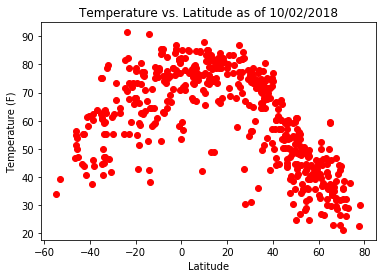

In [100]:
plt.scatter(lats,temps,marker="o",color="red")
plt.title(f'Temperature vs. Latitude as of {datetime.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

## Humidity Analysis

Text(0,0.5,'Humidity (%)')

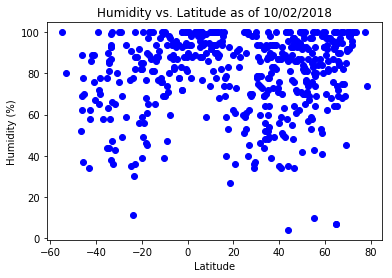

In [102]:
plt.scatter(lats,humidities,marker="o",color="blue")
plt.title(f'Humidity vs. Latitude as of {datetime.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

## Cloudiness Analysis

Text(0,0.5,'Cloudiness (%)')

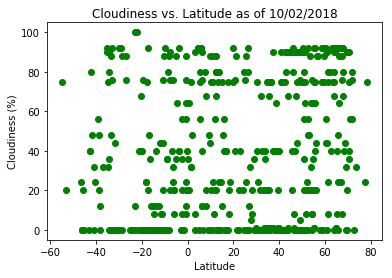

In [105]:
plt.scatter(lats,clouds,marker="o",color="green")
plt.title(f'Cloudiness vs. Latitude as of {datetime.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

## Wind Speed Analysis

Text(0,0.5,'Wind Speed (mph)')

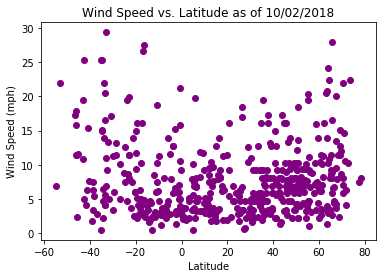

In [107]:
plt.scatter(lats,wind_speeds,marker="o",color="purple")
plt.title(f'Wind Speed vs. Latitude as of {datetime.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")